# Overall Model Performance

In [71]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from functools import reduce
from scipy.stats.stats import pearsonr

In [5]:
data = pd.read_csv('L2 Data Scientist Assessment - Data.csv', dtype = str, encoding = 'cp1252')

In [6]:
data['f1'] = data['f1'].astype(float)
data['accuracy'] = data['accuracy'].astype(float)

background = data[data['class'] == 'Background']
tissue = data[data['class'] == 'Tissue']
lesions = data[data['class'] == 'Lesions']

In [42]:
tissue_models_mean = tissue.groupby('model').agg({'f1':'mean'}).reset_index()
background_models_mean = background.groupby('model').agg({'f1':'mean'}).reset_index()
lesions_models_mean = lesions.groupby('model').agg({'f1':'mean'}).reset_index()

In [43]:
def plot(objects,performance,title):
    y_pos = np.arange(len(objects))
    objects = [x for _,x in sorted(zip(performance,objects),reverse=True)]
    performance = [x for x,_ in sorted(zip(performance,objects),reverse=True)]
    plt.figure(figsize=(16, 10))
    plt.bar(y_pos, performance, align='center', alpha=0.5, width=0.7)
    plt.xticks(y_pos, objects)
    plt.ylabel('Average F1')
    plt.title(title)
    plt.ylim([(min(performance) - 0.1), 1])
    plt.xticks(rotation=45)
    plt.show()

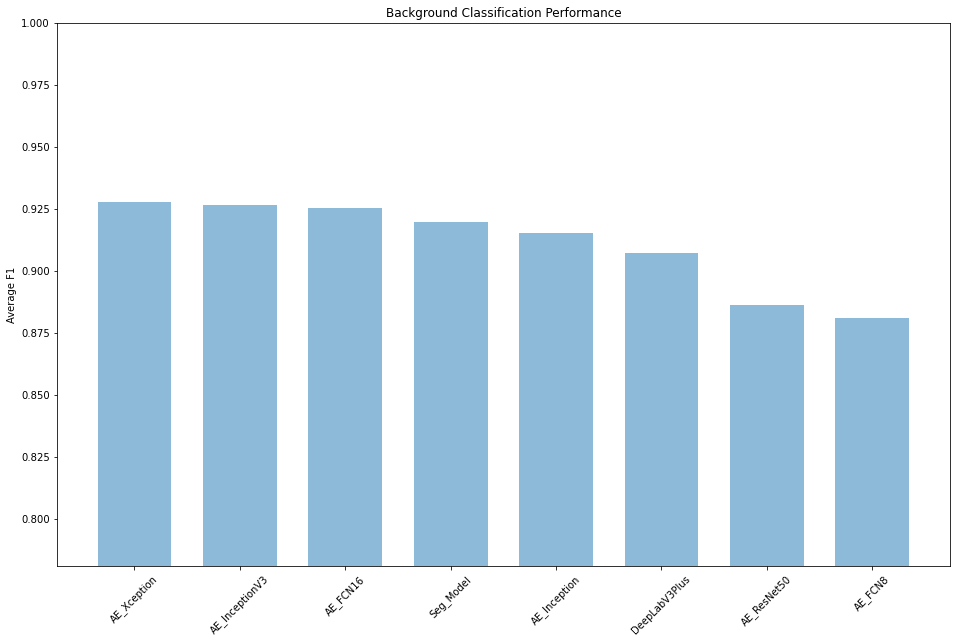

In [44]:
plot(list(background_models_mean['model']),list(background_models_mean['f1']),'Background Classification Performance')

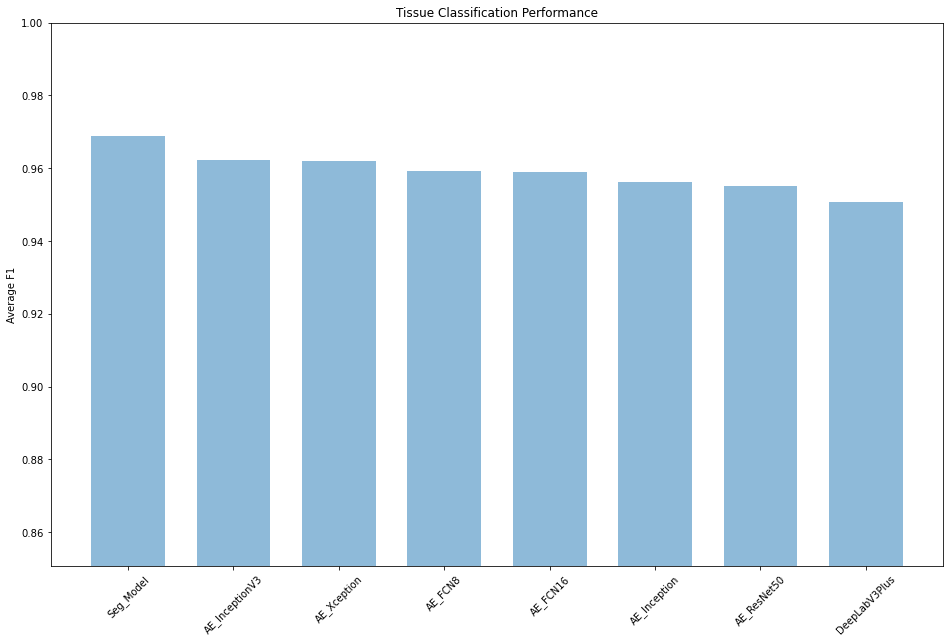

In [45]:
plot(list(tissue_models_mean['model']),list(tissue_models_mean['f1']),'Tissue Classification Performance')

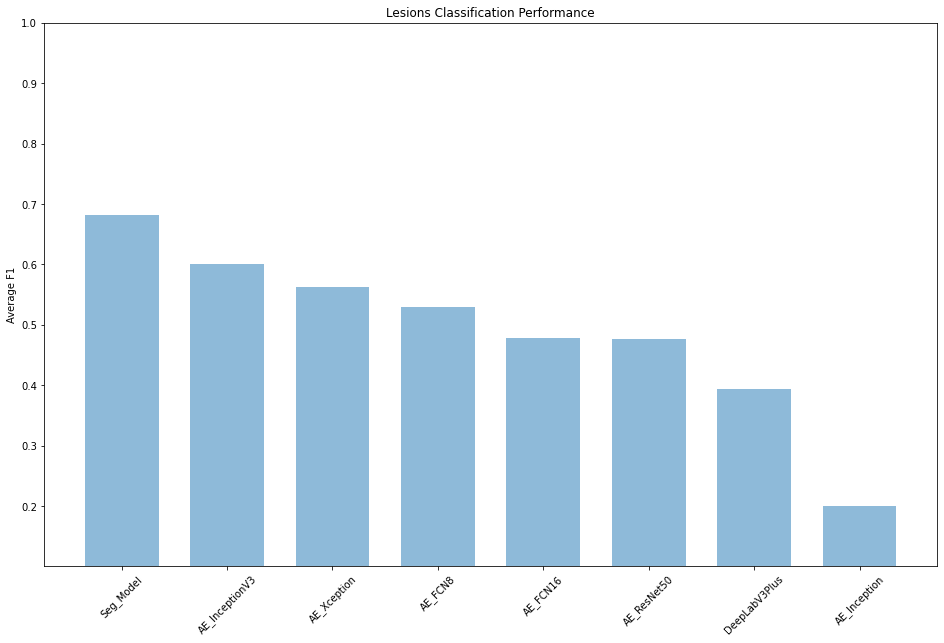

In [8]:
plot(list(lesions_models_mean['model']),list(lesions_models_mean['f1']),'Lesions Classification Performance')

Getting the absolute top performers to ensure that there aren't some outlying excellnt results for other models

In [41]:
tissue_absolute_best = tissue[['model','f1']].sort_values(by='f1',ascending=False).head(20)
lesions_absolute_best = lesions[['model','f1']].sort_values(by='f1',ascending=False).head(20)

In [47]:
tissue_absolute_best

,model,f1
784,Seg_Model,0.979781
373,Seg_Model,0.976506
787,Seg_Model,0.976038
778,Seg_Model,0.975923
196,Seg_Model,0.975733
772,Seg_Model,0.975628
226,Seg_Model,0.975467
634,Seg_Model,0.975064
424,Seg_Model,0.975007
319,Seg_Model,0.974966


In [48]:
lesions_absolute_best

,model,f1
320,Seg_Model,0.778314
656,Seg_Model,0.775863
197,Seg_Model,0.774564
437,Seg_Model,0.771905
26,Seg_Model,0.771742
440,Seg_Model,0.769761
425,Seg_Model,0.766738
260,Seg_Model,0.766386
227,Seg_Model,0.765968
497,Seg_Model,0.765820


In [85]:
ti = list(tissue[tissue['model'] == 'Seg_Model'].sort_values(by='classifier')['f1'].dropna())

In [86]:
le = list(lesions[lesions['model'] == 'Seg_Model'].sort_values(by='classifier')['f1'].dropna())

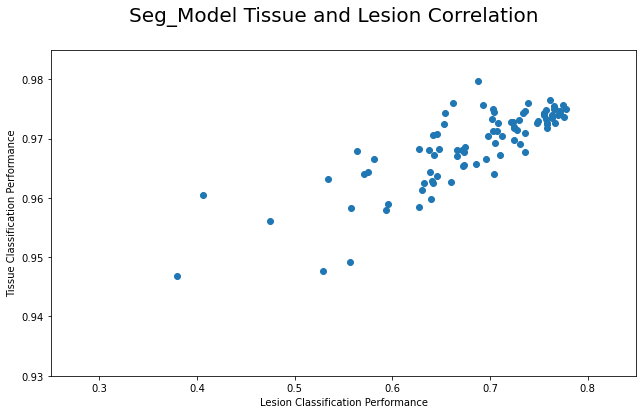

In [98]:
fig = plt.figure(figsize=(10.5,6))
fig.suptitle('Seg_Model Tissue and Lesion Correlation', fontsize=20)
plt.xlabel('Lesion Classification Performance')
plt.ylabel('Tissue Classification Performance')
plt.xlim(0.25,0.85)
plt.ylim(0.93,0.985)
plt.scatter(le, ti)

In [87]:
correlation, p_value = pearsonr(le, ti)

In [88]:
correlation

0.8123578331971675

In [99]:
p_value

4.38723503632288e-22

Correlation greater than 0.8 with a P-Value well below 0.05 indicates a true, strong, positive correlation 